In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import make_checkerboard, make_classification

In [9]:
X_all, y_all = make_classification(
    n_samples=120,
    n_features=2,
    n_classes=2, 
    n_informative=2,
    n_redundant=0,
    random_state=42)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X, X_reserve, y, y_reserve = train_test_split(X_all, y_all, test_size=20, random_state=42)

In [12]:
X.shape

(100, 2)

In [13]:
y.shape

(100,)

In [18]:
type(X)

numpy.ndarray

In [14]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [20]:
pd.DataFrame(X).assign(y=y)

,0,1,y
0,1.638177,1.389071,1
1,1.802591,-0.996984,1
2,0.680559,-1.212639,1
3,-2.823120,0.058548,0
4,1.424448,0.962913,1
...,...,...,...
95,0.299674,1.449662,0
96,1.010966,-1.451909,1
97,-1.019234,-0.749154,0
98,-0.066027,-0.255683,0


In [21]:
X.T[0]  # --> X[:, 0]

array([ 1.63817662,  1.80259112,  0.68055854, -2.82311988,  1.42444754,
       -1.30405785, -2.97434745,  0.9335001 , -1.46402522,  1.10934408,
       -0.55260446,  1.60399488, -0.10216305, -0.11779595, -2.44457987,
        1.62521644, -0.7482634 , -0.17532237,  0.45698656,  1.15528611,
       -0.79426315, -1.20092257, -1.45298767,  1.56327124,  0.30193178,
       -0.56384537,  0.31605595, -2.30237873,  0.94548739, -0.0363979 ,
       -0.78319068,  0.14467705,  1.75002228, -0.76351249, -0.81506696,
       -2.98936678, -0.59654265, -1.62954647,  1.46215558,  0.31802018,
        0.43056225,  0.12448467,  1.14959027,  1.72582839,  1.70089168,
        2.3346656 , -1.26586492, -1.04023672,  0.65194622, -0.37661516,
       -0.12313953, -1.62130925, -0.19599492,  0.93892957,  1.49987302,
        2.60641681, -1.54125663, -0.90581403,  1.34798876,  1.38989067,
        1.16014529,  0.89004104,  0.13667787, -1.93096511, -1.54670888,
        0.40512575, -0.41954654,  0.36651051, -0.43840155,  0.31

Text(0, 0.5, 'Hacim')

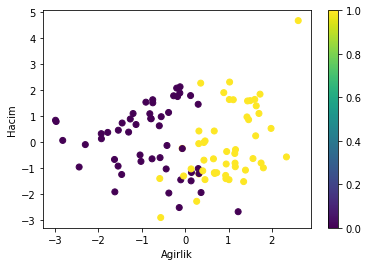

In [22]:
plt.scatter(X.T[0], X.T[1], c=y)
plt.colorbar()
plt.xlabel('Agirlik')
plt.ylabel('Hacim')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
import sklearn
sklearn.__version__

'0.22.1'

In [27]:
model = DecisionTreeClassifier(random_state=42)

In [28]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [29]:
model.score(X_train, y_train)

1.0

In [30]:
model.score(X_test, y_test)

0.75

Tek bir train-test seti icin sonuclar:

In [31]:
depths = range(1, 14)
test_scores = []
train_scores = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))


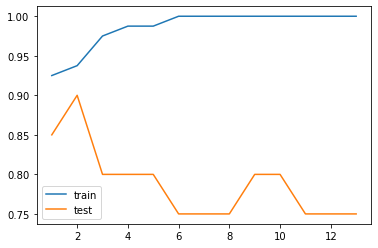

In [32]:
plt.plot(depths, train_scores, label='train')
plt.plot(depths, test_scores, label='test')
plt.legend()

Cross-validation icin sonuclar:

In [33]:
from sklearn.model_selection import cross_validate

In [34]:
cross_validate(model, X, y, cv=10)

{'fit_time': array([0.00199819, 0.00099778, 0.        , 0.00099921, 0.        ,
        0.        , 0.00099826, 0.        , 0.        , 0.00099993]),
 'score_time': array([0.        , 0.        , 0.00099802, 0.        , 0.        ,
        0.00099969, 0.        , 0.        , 0.00099921, 0.        ]),
 'test_score': array([0.9, 1. , 0.7, 0.9, 0.9, 0.8, 0.9, 0.6, 0.9, 0.6])}

In [35]:
depths = range(1, 19)
test_scores = []
train_scores = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d)
    
    results = cross_validate(model, X_train, y_train, return_train_score=True, cv=10)
    
    train_scores.append(results['train_score'].mean())
    test_scores.append(results['test_score'].mean())


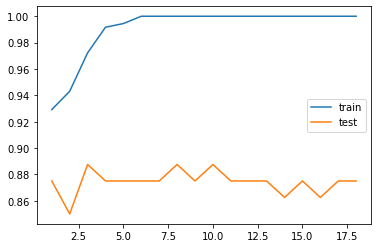

In [36]:
plt.plot(depths, train_scores, label='train')
plt.plot(depths, test_scores, label='test')
plt.legend()

In [37]:
model = DecisionTreeClassifier(max_depth=1)

In [38]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
model.score(X_test, y_test)

0.85

In [40]:
y_pred = model.predict(X)

Text(0, 0.5, 'Hacim')

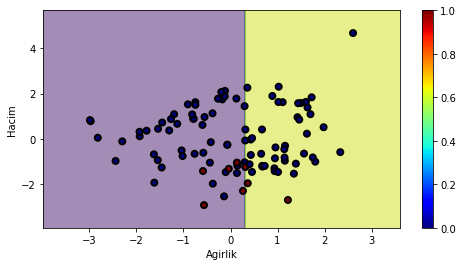

In [153]:
x0range = np.linspace(X.T[0].min() - 1, X.T[0].max() + 1, 1000)
x1range = np.linspace(X.T[1].min() - 1, X.T[1].max() + 1, 1000)

xx, yy = np.meshgrid(x0range, x1range)

plt.figure(figsize=(8, 4))
plt.contourf(xx,
             yy,
             model.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape),
             alpha=0.5
            )
plt.scatter(X.T[0], X.T[1], c=(y!=y_pred), linewidths=2, edgecolors='black', cmap='jet')
plt.colorbar()
plt.xlabel('Agirlik')
plt.ylabel('Hacim')

In [41]:
from sklearn.metrics import confusion_matrix

Egitim seti icin confusion matrix

In [42]:
y_pred = model.predict(X_train)
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,38,1
1,5,36


Test seti icin confusion matrix

In [43]:
y_pred = model.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,9,2
1,1,8


In [44]:
from sklearn.metrics import precision_score, recall_score

Test precision ve recall

In [45]:
precision_score(y_test, y_pred)

0.8

In [46]:
recall_score(y_test, y_pred)

0.8888888888888888

In [47]:
model.predict_proba(X)

array([[0.02702703, 0.97297297],
       [0.02702703, 0.97297297],
       [0.02702703, 0.97297297],
       [0.88372093, 0.11627907],
       [0.02702703, 0.97297297],
       [0.88372093, 0.11627907],
       [0.88372093, 0.11627907],
       [0.02702703, 0.97297297],
       [0.88372093, 0.11627907],
       [0.02702703, 0.97297297],
       [0.88372093, 0.11627907],
       [0.02702703, 0.97297297],
       [0.88372093, 0.11627907],
       [0.88372093, 0.11627907],
       [0.88372093, 0.11627907],
       [0.02702703, 0.97297297],
       [0.88372093, 0.11627907],
       [0.88372093, 0.11627907],
       [0.02702703, 0.97297297],
       [0.02702703, 0.97297297],
       [0.88372093, 0.11627907],
       [0.88372093, 0.11627907],
       [0.88372093, 0.11627907],
       [0.02702703, 0.97297297],
       [0.88372093, 0.11627907],
       [0.88372093, 0.11627907],
       [0.02702703, 0.97297297],
       [0.88372093, 0.11627907],
       [0.02702703, 0.97297297],
       [0.88372093, 0.11627907],
       [0.

Text(0, 0.5, 'Hacim')

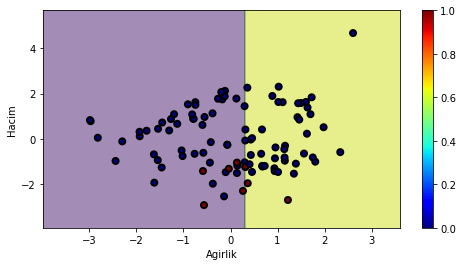

In [49]:
model = DecisionTreeClassifier(max_depth=1)
model.fit(X_train, y_train)

x0range = np.linspace(X.T[0].min() - 1, X.T[0].max() + 1, 1000)
x1range = np.linspace(X.T[1].min() - 1, X.T[1].max() + 1, 1000)

xx, yy = np.meshgrid(x0range, x1range)

plt.figure(figsize=(8, 4))
plt.contourf(xx,
             yy,
             model.predict_proba(np.array([xx.ravel(), yy.ravel()]).T)[:,1].reshape(xx.shape),
             alpha=0.5
            )
plt.scatter(X.T[0], X.T[1], c=(y!=model.predict(X)), linewidths=2, edgecolors='black', cmap='jet')
plt.colorbar()
plt.xlabel('Agirlik')
plt.ylabel('Hacim')

Text(0, 0.5, 'Hacim')

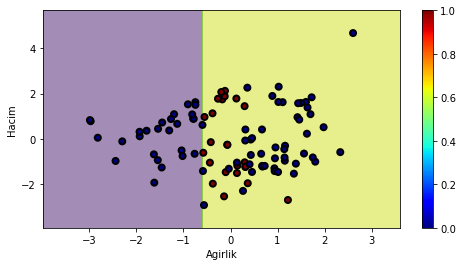

In [50]:
model = DecisionTreeClassifier(class_weight={0:2, 1:50}, max_depth=1)

model.fit(X, y)

x0range = np.linspace(X.T[0].min() - 1, X.T[0].max() + 1, 1000)
x1range = np.linspace(X.T[1].min() - 1, X.T[1].max() + 1, 1000)

xx, yy = np.meshgrid(x0range, x1range)

plt.figure(figsize=(8, 4))
plt.contourf(xx,
             yy,
             model.predict_proba(np.array([xx.ravel(), yy.ravel()]).T)[:,1].reshape(xx.shape),
             alpha=0.5
            )
plt.scatter(X.T[0], X.T[1], c=(y!=model.predict(X)), linewidths=2, edgecolors='black', cmap='jet')
plt.colorbar()
plt.xlabel('Agirlik')
plt.ylabel('Hacim')

In [51]:
recall_score(y, model.predict(X))

1.0

In [52]:
precision_score(y, model.predict(X))

0.6944444444444444

In [89]:
a = [1, 1, 1, 1, 1, 1]
b = [1, 0, 1, 0, 1, 1]
b2 = [1, 1, 1, 0, 1, 1]
c = [0, 0, 0, 0, 0, 0]

In [100]:
b = np.array(b)

In [104]:
len(b[b==1])

4

In [101]:
gelme_olasiligi(b,1)

0.6666666666666666

In [83]:
def gelme_olasiligi(l, sayi):
    return (len(l[l==sayi]) / len(l))

In [84]:
def gini_impurity(x):
    x = np.array(x)
    return 1 - gelme_olasiligi(x, 0)**2 - gelme_olasiligi(x, 1)**2

In [74]:
gini_impurity(a)

0.0

In [75]:
gini_impurity(b)

0.4444444444444444

In [76]:
gini_impurity(b2)

0.2777777777777777

In [68]:
gini_impurity(c)

0.0

In [69]:
a a a a a a a a a a

a a a a a a a a  -> train
|
|_ cross validation -> en iyi derinlik




a a -> test en iyi derinligi burada test et

SyntaxError: invalid syntax (<ipython-input-69-57058e7cbc0c>, line 1)

In [70]:
model = DecisionTreeClassifier(max_depth=1)
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [219]:
model.score(X_reserve, y_reserve)

0.95